In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

Logistic regression is a supervised learning (has labeled data as input) algorithm for classification. The algorithm is fed with samples - with multiple features and it's corresponding classes (labels).

- $M$ - Number of samples
- $N$ - Number of features
- $\boldsymbol{\theta}$ - Vector of minimizing parameters
- $\mathbf{X}$ - Matrix of features (columns) per samples (rows)
- $\mathbf{y}$ - Vector of corresponding labels

In [2]:
M = 100
M_half = 50
N = 2

X1 = np.array([[random.gauss(2,1.25), random.gauss(3,1.25)] for i in range(M_half)])
y1 = np.array((M_half)*[1])

X2 = np.array([[random.gauss(0,1.25), random.gauss(-1,1.25)] for i in range(M_half)])
y2 = np.array((M_half)*[0])

X = np.vstack([X1, X2])
y = np.hstack([y1.T, y2.T])

print("    x1    |     x2    |     y    ")
for i in range(M):
    print("%9.4f | %9.4f | %9.4f" % (X[i,0], X[i,1], y[i]))

    x1    |     x2    |     y    
   2.5270 |    2.9210 |    1.0000
   0.3115 |    0.7692 |    1.0000
   2.4461 |    3.7041 |    1.0000
   3.0175 |    3.1358 |    1.0000
   0.6816 |    5.1012 |    1.0000
   4.0174 |    1.4410 |    1.0000
   2.9419 |    0.8278 |    1.0000
   2.4455 |    3.3914 |    1.0000
   1.7599 |    3.9542 |    1.0000
   5.6273 |    2.7891 |    1.0000
   0.3197 |    1.2381 |    1.0000
   1.0049 |    3.7864 |    1.0000
   3.5490 |    2.8646 |    1.0000
   1.9095 |    2.2998 |    1.0000
   1.5508 |    3.4234 |    1.0000
   2.6294 |    2.3684 |    1.0000
   0.3369 |    2.5102 |    1.0000
   1.0488 |    2.9464 |    1.0000
   0.6809 |    6.2589 |    1.0000
   1.1225 |    3.4220 |    1.0000
   0.7985 |    4.0551 |    1.0000
   3.2548 |    1.6197 |    1.0000
   1.1985 |    2.8151 |    1.0000
   2.5578 |    2.8430 |    1.0000
   2.4867 |    2.6196 |    1.0000
   3.1555 |    1.5753 |    1.0000
   1.9293 |    4.4972 |    1.0000
   2.7472 |    2.4714 |    1.0000
   1.3746 |   

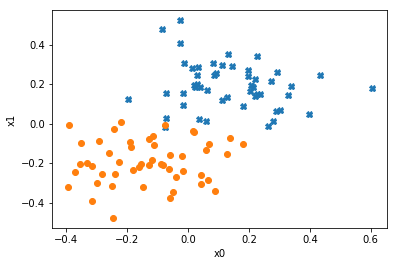

In [8]:
plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
plt.show()

# Feature scaling (rescale and mean normalization)

One way of feature scaling is to keep the average of each feature as a predefined number (e.g. 0) and scale the values between the range of values. We can define two vectors mu and delta for keeping these numbers:

$$\mu_n = \frac{1}{M}\sum\limits_{m = 0}^M x_{mn}$$  
$$\delta_n = max(\mathbf{x_n}) - min(\mathbf{x_n})$$  
$$x_{mn} \leftarrow \frac{x_{mn} - \mu_{n}}{\delta_n}$$  

In [4]:
mu = np.array([np.average(X[:,0]), np.average(X[:,1])])
delta = np.array([(np.max(X[:,0]) - np.min(X[:,0])), (np.max(X[:,1]) - np.min(X[:,1]))])

X = (X - np.ones([M,1])*mu)*(np.ones([M,1])*(1/delta))

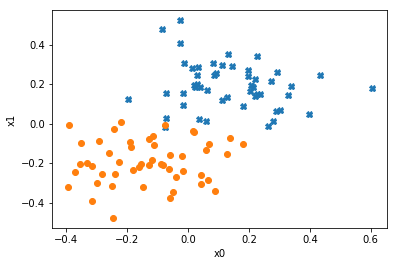

In [7]:
plt.plot(X[:M_half,0], X[:M_half,1], 'X'), plt.xlabel('x0'), plt.ylabel('x1')
plt.plot(X[M_half:,0], X[M_half:,1], 'o'), plt.xlabel('x0'), plt.ylabel('x1')
plt.show()

# Hyphotesis and Cost function

The objective of the logistic regression is to find a *hyphotesis function*  $\mathbf{h_\theta} = \mathbf{h_\theta (X)}$ - or the parameters of this function $\boldsymbol{\theta}$ - such as the *cost function* $v = v(\mathbf{X}, \mathbf{y}, \boldsymbol{\theta})$ - diference between predictions and labels - is minimized.

In linear regression, the most general hypothesis was:

$$\mathbf{h_\theta} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N$$

If we define an matrix $\mathbf{X'}$ such as the first column (first feature) is always 1, then we can write:

$$\mathbf{h_\theta} = \sum \limits_{n = 0}^N \theta_nx'_n$$  

or in vectorized notation:

$$\mathbf{h_\theta} = \mathbf{X'\theta}$$

In the case of logistic regression, it is best that the values range between 0 and 1, representing the probability of the selected point being marked as pertencent of the class (y = 1). We can use the logistic function (sigmoid) for the hypothesis:

![Logistic Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

$$\mathbf{g}(\mathbf{z}) = \frac{1}{1+e^{-\mathbf{z}}} = \frac{e^{\mathbf{z}}}{e^{\mathbf{z}}+1}$$

So we can define the hypothesis as:

$$\mathbf{h_\theta} = \mathbf{g}(\mathbf{X'}\boldsymbol{\theta}) = \frac{1}{1+e^{-\mathbf{X'}\boldsymbol{\theta}}}$$

One possibility of cost function for a hypothis ranging between 0 and 1 is to use the *Cross-entropy cost* formula:  

$$v = -\frac{1}{2M}\sum \limits_{m = 1}^{M}[y_m log(h_\theta(\mathbf{x_m})) + (1-y_m)log(1 - h_\theta(\mathbf{x_m}))]$$  

Or in the vectorized notation (thus less computacionaly demanding):  

$$v = -\frac{1}{2M}[\mathbf{y} log(\mathbf{h_\theta}) + (\mathbf{1_m}-\mathbf{y})log(\mathbf{1_m} - \mathbf{h_\theta})]$$ 